In [ ]:
# For imprving skills in group by
## agg attribute and then values attribute
## column can be converted as date time using the below methods
### - while reading csv it can be parsed as datetime and then column can be interpreted as column.dt.{hour,month,year}
### - also pd.to_datetime can be used to convert into datetime dtype and can be accessed as df.map(lambda x: x.hour)

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [51]:
train = pd.read_csv("train_bikes.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
print(train["season"].unique())
print(train["holiday"].unique())
print(train["workingday"].unique())
print(train["weather"].unique())

[1 2 3 4]
[0 1]
[0 1]
[1 2 3 4]


## analysis through plots

<AxesSubplot:xlabel='season', ylabel='count'>

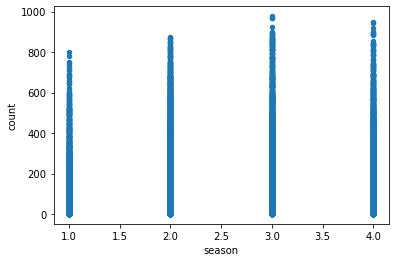

In [53]:
train.plot.scatter(x="season",y="count")

<AxesSubplot:xlabel='workingday', ylabel='count'>

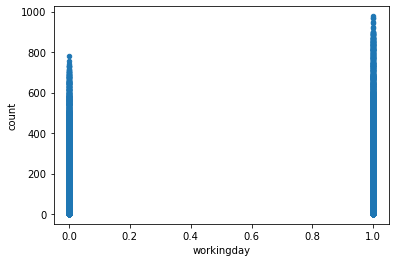

In [54]:
train.plot.scatter(x="workingday", y="count")

<AxesSubplot:xlabel='holiday', ylabel='count'>

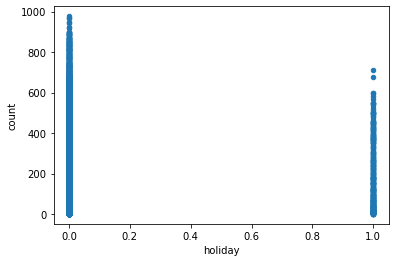

In [55]:
train.plot.scatter(x="holiday",y="count")

<AxesSubplot:xlabel='weather', ylabel='count'>

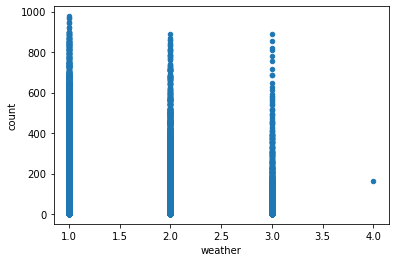

In [56]:
train.plot.scatter(x="weather",y="count")

<AxesSubplot:xlabel='hour'>

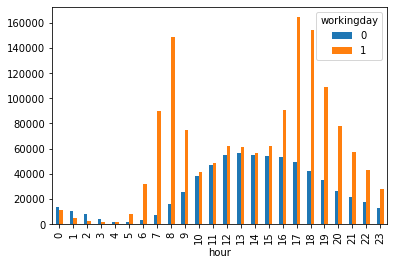

In [57]:
def plot_by_hour(data, year=None, agg="sum"):
    dd = data
    if year:
        dd = dd[dd["datetime"].dt.year == year]
    dd["hour"] = dd["datetime"].dt.hour
    fin = dd.groupby(["hour","workingday"])["count"].agg(agg).unstack()
    return fin.plot.bar()

plot_by_hour(train)
    

In [58]:
train["hour"] = train["datetime"].dt.hour
x = train.groupby(["hour", "workingday"])["count"].agg("sum").unstack() 

## group by will allow to gather data based on the columns selected, .first will be helpful to view the data
## unstack will convert back into dataframe and we can use for plotting
## agg function will give the final value of the selection made in groupby 
x

workingday,0,1
hour,,
0,13701,11387
1,10427,4945
2,7686,2573
3,3677,1414
4,1239,1593
5,1331,7604
6,2899,31799
7,6854,90114
8,16277,148783


In [59]:
dd = train.copy()
dd["month"] = dd["datetime"].dt.month
fin = dd.groupby("month")["count"].agg("sum")
fin

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

<AxesSubplot:xlabel='month'>

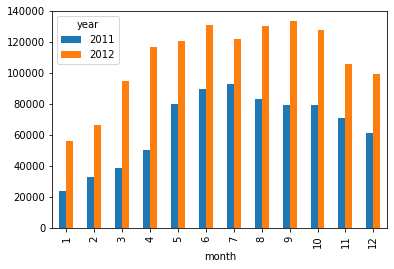

In [60]:
def plot_by_year(aggr_type):
    dd = train.copy()
    dd["year"] = dd["datetime"].dt.year
    dd["month"] = dd["datetime"].dt.month
    dd["hour"] = dd["datetime"].dt.hour
    
    fin = dd.groupby([aggr_type,"year"])["count"].agg("sum").unstack()
    
    return fin.plot(kind="bar")

plot_by_year("month")
    

<ipython-input-65-6c235307af91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd1["hour"] = dd1['datetime'].dt.hour
<ipython-input-65-6c235307af91>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd2["hour"] = dd2['datetime'].dt.hour


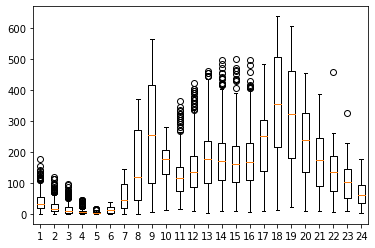

In [65]:
def count_per_hour(data):
    dd = data.copy()
    
    dd1 = dd[dd["datetime"].dt.year==2011]
    dd2 = dd[dd["datetime"].dt.year==2012]
    
    dd1["hour"] = dd1['datetime'].dt.hour
    dd2["hour"] = dd2['datetime'].dt.hour
    
    hours1 = {}
    hours2 = {}
    
    for i in range(24):
        hours1[i] = dd1[dd1["hour"]==i]["count"].values
        hours2[i] = dd2[dd2["hour"]==i]["count"].values
        
    plt.boxplot( [hours1[hour] for hour in range(24)] )

count_per_hour(train)
    